To generate the table, run propeller_lookup_table.py. Once generated successfully, the data will be stored in lookup_table folder. The following section is an example to generate a subset of a lookup table. For debug and development purpose, generating a small lookup table as trial can save time. 

In [1]:
import numpy as np
from propeller_lookup_table import PropellerLookupTable
import blade_params

PropellerLookupTable.Maker.make_propeller_lookup_table("apc_8x6_simple", blade_params.APC_8x6(), np.array(PropellerLookupTable.Maker._DEFAULT_OMEGA_RANGE[5:]), np.array(
    PropellerLookupTable.Maker._DEFAULT_U_FREE_X_RANGE[8:9]), np.array(PropellerLookupTable.Maker._DEFAULT_PITCH_RANGE[5:]))

[PropellerLookupTable] Making lookup table:
Omega range: [ 600  700  800  900 1000 1500 2000 2600]
u_free_x range: [13]
Pitch range: [0.         0.26179939 0.52359878 0.78539816 1.04719755 1.57079633]
u_free_x: 13.0000, pitch: 0.0000, omega: 600.0000, forces: (0.2896, -0.0000, 1.9236), v_i: 1.8991
u_free_x: 13.0000, pitch: 0.0000, omega: 700.0000, forces: (0.3338, -0.0000, 2.6070), v_i: 2.5493
u_free_x: 13.0000, pitch: 0.0000, omega: 800.0000, forces: (0.3775, -0.0000, 3.4133), v_i: 3.2904
u_free_x: 13.0000, pitch: 0.0000, omega: 900.0000, forces: (0.4205, -0.0000, 4.3449), v_i: 4.1079
u_free_x: 13.0000, pitch: 0.0000, omega: 1000.0000, forces: (0.4631, -0.0000, 5.4036), v_i: 4.9854
u_free_x: 13.0000, pitch: 0.0000, omega: 1500.0000, forces: (0.6682, -0.0000, 12.5876), v_i: 9.7785
u_free_x: 13.0000, pitch: 0.0000, omega: 2000.0000, forces: (0.8643, -0.0000, 22.8746), v_i: 14.6464
u_free_x: 13.0000, pitch: 0.0000, omega: 2600.0000, forces: (1.0918, -0.0000, 39.2676), v_i: 20.3434
u_free

The following example generates the full lookup table of apc_8x6.

In [1]:
from propeller_lookup_table import PropellerLookupTable

PropellerLookupTable.Maker.make_propeller_lookup_table("apc_8x6_with_trail")

[PropellerLookupTable] Making lookup table:
Omega range: [   0  200  300  400  500  600  700  800  900 1000 1500 2000 2600]
u_free_x range: [ 0  1  2  3  4  5  7 10 13 15 17 20]
Pitch range: [-1.57079633 -1.04719755 -0.78539816 -0.52359878 -0.26179939  0.
  0.26179939  0.52359878  0.78539816  1.04719755  1.57079633]
u_free_x: 0, pitch: -90.0, omega: 0, forces: (0.0, 0.0, 0.0), v_i: 0.0
u_free_x: 0, pitch: -90.0, omega: 200, forces: (-2.587250373041771e-19, -3.0144208526886046e-18, 0.23976891748871335), v_i: 1.7346881344947922
u_free_x: 0, pitch: -90.0, omega: 300, forces: (-3.3230808351027195e-18, -6.254077177529317e-18, 0.5406464465624083), v_i: 2.606546499291158
u_free_x: 0, pitch: -90.0, omega: 400, forces: (-3.761014515352928e-18, -1.147006842081253e-17, 0.9626177225919359), v_i: 3.4787846139665275
u_free_x: 0, pitch: -90.0, omega: 500, forces: (-6.869256031296437e-18, -1.9634374300989744e-17, 1.5052236710483298), v_i: 4.3505126399119245
u_free_x: 0, pitch: -90.0, omega: 600, force

To use the lookup table, users can find the table data under lookup_table. The following example shows how to load the lookup table and query the rotor forces.

[PropellerLookupTable] Reading data from lookup_table\apc_8x6_with_trail.yaml


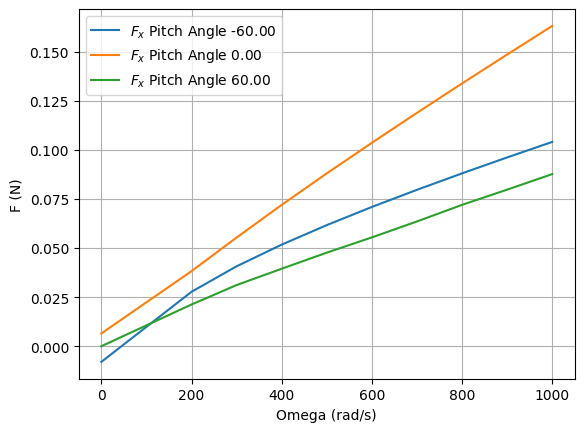

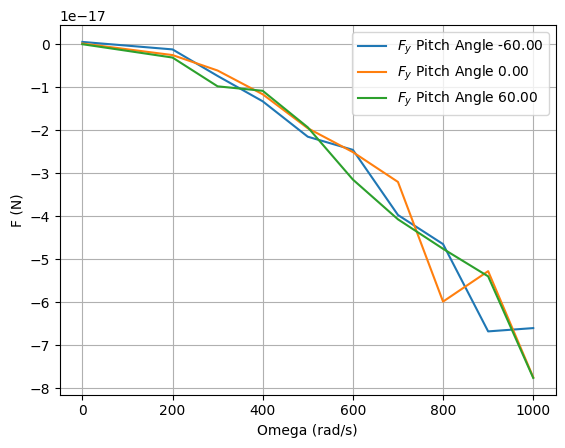

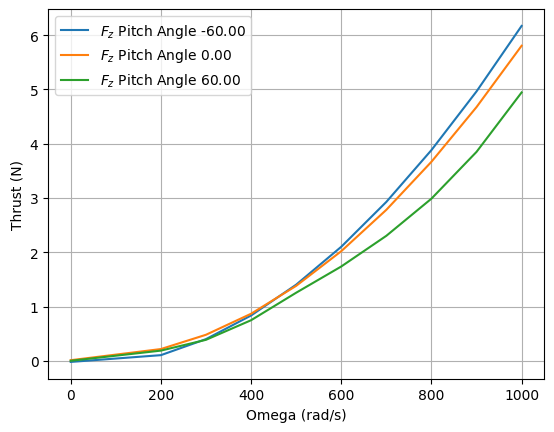

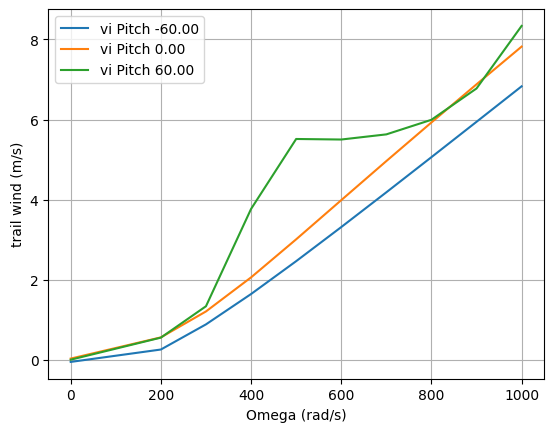

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from propeller_lookup_table import PropellerLookupTable

apc_8x6 = PropellerLookupTable.Reader("apc_8x6_with_trail")

u_free_x_range = [5]
pitch_range = np.deg2rad([-90, -60, -30, 0, 30, 60, 90])
pitch_range = np.deg2rad([-60, 0, 60])    # for paper fig
omega_range = np.array([0, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

forces_grouped_by_pitch_then_omega = []
for u_free_x in u_free_x_range:
    for pitch in pitch_range:
        forces_by_omega = []
        for omega in omega_range:
            forces_by_omega.append(apc_8x6.query_data_from_table(u_free_x, pitch, omega))
        forces_grouped_by_pitch_then_omega.append(forces_by_omega)
forces_grouped_by_pitch_then_omega = np.array(forces_grouped_by_pitch_then_omega)

plt.figure()
for i, pitch in enumerate(pitch_range):
    plt.plot(omega_range, forces_grouped_by_pitch_then_omega[i, :, 0], label=fr"$F_x$ Pitch Angle {np.rad2deg(pitch):.2f}")
plt.xlabel("Omega (rad/s)")
plt.ylabel("F (N)")
plt.legend()
plt.grid()    
plt.figure()
for i, pitch in enumerate(pitch_range):
    plt.plot(omega_range, forces_grouped_by_pitch_then_omega[i, :, 1], label=fr"$F_y$ Pitch Angle {np.rad2deg(pitch):.2f}")
plt.xlabel("Omega (rad/s)")
plt.ylabel("F (N)")
plt.legend()
plt.grid()    
plt.figure()
for i, pitch in enumerate(pitch_range):
    plt.plot(omega_range, forces_grouped_by_pitch_then_omega[i, :, 2], label=fr"$F_z$ Pitch Angle {np.rad2deg(pitch):.2f}")
plt.xlabel("Omega (rad/s)")
plt.ylabel("Thrust (N)")
plt.legend()
plt.grid()
plt.figure()
for i, pitch in enumerate(pitch_range):
    plt.plot(omega_range, forces_grouped_by_pitch_then_omega[i, :, 3], label=f"vi Pitch {np.rad2deg(pitch):.2f}")
plt.xlabel("Omega (rad/s)")
plt.ylabel("trail wind (m/s)")
plt.legend()
plt.grid()    
plt.show()




The following example shows how to compute rotor forces.

[PropellerLookupTable] Reading data from lookup_table\apc_8x6_with_trail.yaml
fig 1: rotor straight up
f_x: 0.2848103111871863, f_y: -4.6251462343691336e-17, f_z: 3.468475863948802
fig 2: rotor frame rotated in x-y plane (should not change the force)
f_x: 0.2848103111871863, f_y: -4.6251462343691336e-17, f_z: 3.468475863948802
fig 3: forward velocity (should be the same as fig 2)
f_x: 0.2848103111871863, f_y: -4.6251462343691336e-17, f_z: 3.468475863948802
fig 4: z axis along the free stream
f_x: 2.671622609841204, f_y: -1.886263413844378e-16, f_z: -6.232475955078896e-17


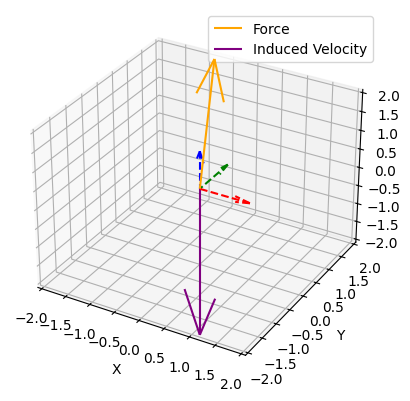

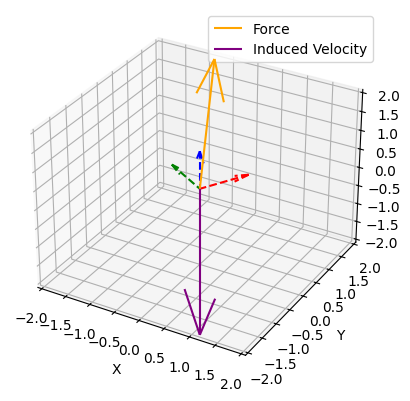

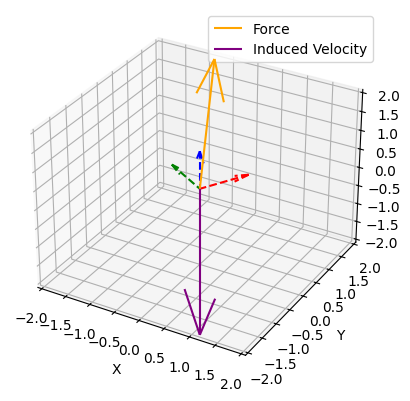

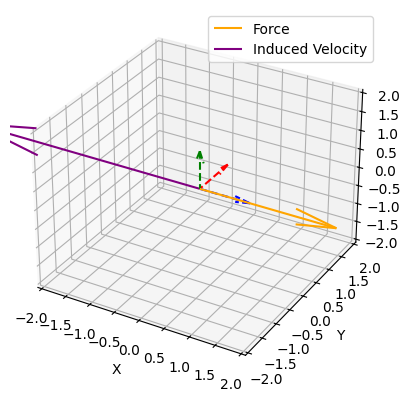

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from propeller_lookup_table import PropellerLookupTable

apc_8x6 = PropellerLookupTable.Reader("apc_8x6_with_trail")
u_free = np.array([10, 0, 0])
v_forward = np.array([0, 0, 0])
omega = 800
r_disk = np.eye(3)
is_ccw = True

print("fig 1: rotor straight up")
forces, v_i = apc_8x6.get_rotor_forces(u_free, v_forward, r_disk, omega, is_ccw)
PropellerLookupTable.Reader.plot_rotor_force(r_disk, forces, v_i)

print("fig 2: rotor frame rotated in x-y plane (should not change the force)")
theta = np.pi / 3
r_disk = np.array([[np.cos(theta), np.sin(theta), 0],   # x axis after transpose
                   [-np.sin(theta), np.cos(theta), 0],  # y axis after transpose
                   [0, 0, 1]]).T    # z axis after transpose
forces, v_i = apc_8x6.get_rotor_forces(u_free, v_forward, r_disk, omega, is_ccw)
PropellerLookupTable.Reader.plot_rotor_force(r_disk, forces, v_i)


print("fig 3: forward velocity (should be the same as fig 2)")
v_forward = np.array([-10, 0, 0])
u_free = np.array([0, 0, 0])
forces, v_i = apc_8x6.get_rotor_forces(u_free, v_forward, r_disk, omega, is_ccw)
PropellerLookupTable.Reader.plot_rotor_force(r_disk, forces, v_i)

print("fig 4: z axis along the free stream")
r_disk = np.array([[0, 1, 0],   # x axis after transpose
                   [0, 0, 1],   # y axis after transpose
                   [1, 0, 0]]).T    # z axis after transpose
forces, v_i = apc_8x6.get_rotor_forces(u_free, v_forward, r_disk, omega, is_ccw)
PropellerLookupTable.Reader.plot_rotor_force(r_disk, forces, v_i)

plt.show()
